# Predicting the PRICE of items listed in Vinted #

## Description ##

Vinted is a Lithuanian online marketplace and community that allows users to sell, buy, and swap secondhand clothing, accessories and even some homeware. It has a built-in price indicator however it doesn’t show what it’s based on and doesn’t seem correct. Therefore, I decided to create my own. 

## Importing libraries ##


In [56]:
import seaborn as sns
import sklearn as sk 
import pandas as pd
import matplotlib.pyplot as plt 
import math
import numpy as np

from scipy.stats.stats import pearsonr

## Pre processing ##

First, I am going to load my data into the notebook. I have used the following API: https://github.com/Gertje823/Vinted-Scraper, and added a few more variables, such as likes and views, followers and reviews of the user. I have tried to scrape the data on my own, however it was too big of a project to complete it in the timeframe as I don't have much experience with selenium and the code is bugged at the moment, which I found out when I researched the project. Also, Vinted is a pain when working with chrome as the website doesn't work correctly there. 

In [2]:
df = pd.read_csv("vinted.csv", encoding="mac_roman")
df.head()

,ID,User_id,Sold,Gender,Category,subcategory,size,State,Brand,Colors,Price,Image,Images,Description,Title,Views,Interested,Followers,Reviews
0,841147011,36260360,NaN,F,1056,NaN,M / 38 / 10,Very good,Vintage,Beige,29.0,NaN,downloads/36260360/02_001dc_MwJ13zB5p3XFmLf1R1...,I feel like a super hot housewife from the 70s...,70s vintage dress,114,20,14,2
1,841147011,36260360,NaN,F,1056,NaN,M / 38 / 10,Very good,Vintage,Beige,29.0,NaN,downloads/36260360/02_00426_nmubCYL57j3nuE9GCo...,I feel like a super hot housewife from the 70s...,70s vintage dress,114,20,14,2
2,841147011,36260360,NaN,F,1056,NaN,M / 38 / 10,Very good,Vintage,Beige,29.0,NaN,downloads/36260360/02_023d6_gMZpDS9ghHsFMezTiA...,I feel like a super hot housewife from the 70s...,70s vintage dress,114,20,14,2
3,841212517,36260360,NaN,F,18,NaN,S / 36 / 8,Very good,Vintage,Black,30.0,NaN,downloads/36260360/02_01698_oPJfcfg6w1sGN83REe...,Crop top and matching flared pants. Only worn ...,Twin set!,231,26,14,2
4,841212517,36260360,NaN,F,18,NaN,S / 36 / 8,Very good,Vintage,Black,30.0,NaN,downloads/36260360/02_025ce_51be5qzNa2vozgepRc...,Crop top and matching flared pants. Only worn ...,Twin set!,231,26,14,2


I used the encoding parameter to load the dataset because it wouldn't load correctly and would give an error. 

I want to rename the column "size" as I want it to start with a capital letter like the others. "Subcategory" is also with a lower letter, however I am not going to use the column so I am not going to bother changing it.

In [3]:
df.rename(columns={"size":"Size"}, inplace=True)
df.head()

,ID,User_id,Sold,Gender,Category,subcategory,Size,State,Brand,Colors,Price,Image,Images,Description,Title,Views,Interested,Followers,Reviews
0,841147011,36260360,NaN,F,1056,NaN,M / 38 / 10,Very good,Vintage,Beige,29.0,NaN,downloads/36260360/02_001dc_MwJ13zB5p3XFmLf1R1...,I feel like a super hot housewife from the 70s...,70s vintage dress,114,20,14,2
1,841147011,36260360,NaN,F,1056,NaN,M / 38 / 10,Very good,Vintage,Beige,29.0,NaN,downloads/36260360/02_00426_nmubCYL57j3nuE9GCo...,I feel like a super hot housewife from the 70s...,70s vintage dress,114,20,14,2
2,841147011,36260360,NaN,F,1056,NaN,M / 38 / 10,Very good,Vintage,Beige,29.0,NaN,downloads/36260360/02_023d6_gMZpDS9ghHsFMezTiA...,I feel like a super hot housewife from the 70s...,70s vintage dress,114,20,14,2
3,841212517,36260360,NaN,F,18,NaN,S / 36 / 8,Very good,Vintage,Black,30.0,NaN,downloads/36260360/02_01698_oPJfcfg6w1sGN83REe...,Crop top and matching flared pants. Only worn ...,Twin set!,231,26,14,2
4,841212517,36260360,NaN,F,18,NaN,S / 36 / 8,Very good,Vintage,Black,30.0,NaN,downloads/36260360/02_025ce_51be5qzNa2vozgepRc...,Crop top and matching flared pants. Only worn ...,Twin set!,231,26,14,2


Then I am going to subset my dataset into categories I actually want to use. If you look correctly you can see that there might be duplicates. However, that's because of the "Images" column where the images of the items are stored. Each row for each item indicates a unique picture. I have to transform this column into something different to actually make it useful later, but first subsetting the data.

In [4]:
df_sub = df[["ID", "Category","Price", "Size", "State", "Brand", "Colors", "Images", "Views", "Interested"]]
df_sub.head()

,ID,Category,Price,Size,State,Brand,Colors,Images,Views,Interested
0,841147011,1056,29.0,M / 38 / 10,Very good,Vintage,Beige,downloads/36260360/02_001dc_MwJ13zB5p3XFmLf1R1...,114,20
1,841147011,1056,29.0,M / 38 / 10,Very good,Vintage,Beige,downloads/36260360/02_00426_nmubCYL57j3nuE9GCo...,114,20
2,841147011,1056,29.0,M / 38 / 10,Very good,Vintage,Beige,downloads/36260360/02_023d6_gMZpDS9ghHsFMezTiA...,114,20
3,841212517,18,30.0,S / 36 / 8,Very good,Vintage,Black,downloads/36260360/02_01698_oPJfcfg6w1sGN83REe...,231,26
4,841212517,18,30.0,S / 36 / 8,Very good,Vintage,Black,downloads/36260360/02_025ce_51be5qzNa2vozgepRc...,231,26


When I first looked at my dataset I thought there were a lot of duplicates. However, when I looked at it closer, it seemed to have made a row for each different image. There could have been a possibility to work with pictures however we didn't really discuss it too much in class and I am not that confident in my skills yet. But I did want to use that data and not just throw it away as it could be quite useful. Instead I am going to count the amount of pictures that has been used to display an item and put it into a new column and named "Amount_Of_Pictures". 

In [5]:
df_sub["Amount_Of_Pictures"] = df_sub.groupby("ID")["ID"].transform("count")
df_sub.head()

C:\Users\NMari\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,ID,Category,Price,Size,State,Brand,Colors,Images,Views,Interested,Amount_Of_Pictures
0,841147011,1056,29.0,M / 38 / 10,Very good,Vintage,Beige,downloads/36260360/02_001dc_MwJ13zB5p3XFmLf1R1...,114,20,3
1,841147011,1056,29.0,M / 38 / 10,Very good,Vintage,Beige,downloads/36260360/02_00426_nmubCYL57j3nuE9GCo...,114,20,3
2,841147011,1056,29.0,M / 38 / 10,Very good,Vintage,Beige,downloads/36260360/02_023d6_gMZpDS9ghHsFMezTiA...,114,20,3
3,841212517,18,30.0,S / 36 / 8,Very good,Vintage,Black,downloads/36260360/02_01698_oPJfcfg6w1sGN83REe...,231,26,4
4,841212517,18,30.0,S / 36 / 8,Very good,Vintage,Black,downloads/36260360/02_025ce_51be5qzNa2vozgepRc...,231,26,4


Now there are actual duplicates which I need to remove. 

In [6]:
df_sub = df_sub.drop_duplicates(subset = "ID") 
df_sub.head()

,ID,Category,Price,Size,State,Brand,Colors,Images,Views,Interested,Amount_Of_Pictures
0,841147011,1056,29.0,M / 38 / 10,Very good,Vintage,Beige,downloads/36260360/02_001dc_MwJ13zB5p3XFmLf1R1...,114,20,3
3,841212517,18,30.0,S / 36 / 8,Very good,Vintage,Black,downloads/36260360/02_01698_oPJfcfg6w1sGN83REe...,231,26,4
7,836855778,529,15.0,M / 38 / 10,Very good,Vintage,White,downloads/36260360/02_010a0_wNYXCEeZL6KQQVbuJj...,83,20,1
8,836637612,1084,165.0,M / 38 / 10,Very good,genuine leather,Black,downloads/36260360/02_00226_Mjxa1wDtJb8XKRuPUe...,534,27,8
16,841235285,532,60.0,M / 38 / 10,Very good,Dolce & Gabbana,Light blue,downloads/36260360/02_01ed6_iVjkafsoxaFKgQdb2L...,94,9,6


Lastly, I am going to drop the column "Images" because I don't need it anymore because I already transformed that data into a new useful column. 

In [7]:
df_sub = df_sub.drop(["Images"], axis = 1) 
df_sub.head()

,ID,Category,Price,Size,State,Brand,Colors,Views,Interested,Amount_Of_Pictures
0,841147011,1056,29.0,M / 38 / 10,Very good,Vintage,Beige,114,20,3
3,841212517,18,30.0,S / 36 / 8,Very good,Vintage,Black,231,26,4
7,836855778,529,15.0,M / 38 / 10,Very good,Vintage,White,83,20,1
8,836637612,1084,165.0,M / 38 / 10,Very good,genuine leather,Black,534,27,8
16,841235285,532,60.0,M / 38 / 10,Very good,Dolce & Gabbana,Light blue,94,9,6


Just to be neat I am going to set the index to the item ID. 

In [8]:
df_sub = df_sub.set_index("ID")
df_sub.head()

,Category,Price,Size,State,Brand,Colors,Views,Interested,Amount_Of_Pictures
ID,,,,,,,,,
841147011,1056,29.0,M / 38 / 10,Very good,Vintage,Beige,114,20,3
841212517,18,30.0,S / 36 / 8,Very good,Vintage,Black,231,26,4
836855778,529,15.0,M / 38 / 10,Very good,Vintage,White,83,20,1
836637612,1084,165.0,M / 38 / 10,Very good,genuine leather,Black,534,27,8
841235285,532,60.0,M / 38 / 10,Very good,Dolce & Gabbana,Light blue,94,9,6


To make sure the model won't see the Categories as numbers but as categories I will have to replace them to categorical variables. I had to look into the API and inspect the HTML of Vinted to ensure I classify the category_id to the actual category title.

In [9]:
cleanup_nums = {"Category": {1084: "Jacket", 1833: "Jacket", 1090: "Jacket", 1080: "Coat", 1834: "Coat", 1804: "Jacket", 1078: "Jacket", 1079: "Jacket", 1075: "Jacket", 1831: "Jacket", 1081: "Jacket", 1086: "Jacket", 1832: "Jacket", 1773: "Coat", 1091: "Jacket", 196: "Sweater", 190: "Sweater", 191: "Sweater", 192: "Sweater", 
                             529: "Sweater", 193: "Sweater", 1066: "Sweater", 1067: "Cardigan", 194: "Cardigan", 195: "Cardigan", 1874: "Cardigan", 197: "Sweater", 532: "Jacket", 1125: "Suit", 1126: "Suit", 1128: "Suit", 1129: "Suit", 
                             178: "Dress", 1056: "Dress", 1055: "Dress", 1775: "Dress", 1776: "Dress", 1777: "Dress", 1778: "Dress", 1060: "Dress", 1065: "Dress", 1779: "Dress", 1057: "Dress", 1059: "Dress", 
                             1061: "Dress", 1058: "Dress", 179: "Dress", 176: "Dress", 198: "Skirt", 199: "Skirt", 200: "Skirt", 1092: "Skirt", 1093: "Skirt", 1094: "Skirt", 540: "Skirt", 1097: "Skirt", 
                             539: "Skirt", 541: "Skirt", 542: "Skirt", 1: "Top", 534: "Cardigan", 227: "Top", 1041: "Top", 223: "Blouse", 224: "Blouse", 225: "Blouse", 1835: "Top", 1042: "Top", 1045: "Top", 1837: "Top", 
                             1044: "Top", 228: "Top", 1839: "Jeans", 1840: "Jeans", 1841: "Jeans", 1842: "Jeans", 1843: "Jeans", 1844: "Jeans", 1845: "Jeans", 1864: "Jeans",1070: "Pants", 1071: "Pants", 185: "Pants", 187: "Pants", 
                             1846: "Pants", 184: "Pants", 525: "Pants", 526: "Pants", 189: "Pants", 1838: "Shorts", 1099: "Shorts", 203: "Shorts", 538: "Shorts", 1101: "Shorts", 1100: "Shorts", 1103: "Shorts", 204: "Shorts", 
                             205: "Shorts", 1131: "Suit", 1132: "Suit", 1134: "Suit",218: "Swimsuit", 219: "Swimsuit", 1780: "Accessory", 119: "Underwear", 120: "Underwear", 229: "Underwear",1781: "Underwear", 
                             123: "Pajamas", 1030: "Pajamas", 1263: "Accessory", 1262: "Accessory", 1847: "Accessory", 124: "Pajamas", 571: "Athletic Wear", 572: "Athletic Wear", 573: "Athletic Wear", 577: "Athletic Wear",
                             1440: "Accessory", 1782: "Suit", 18: "Suit", 216: "Shoes", 214: "Sneakers", 1449: "Sneakers", 207: "Shoes", 210: "Boots", 1052: "Shoes", 1050: "Shoes", 1046: "Heels", 544: "Heels", 206: "Heels", 211: "Boots", 
                             156: "Bag", 158: "Bag", 552: "Bag", 159: "Bag", 1848: "Bag", 1493: "Bag", 155: "Bag", 1140: "Accessory", 1852: "Accessory", 1221: "Accessory", 1123: "Accessory", 230: "Hat", 231: "Hat", 233: "Hat", 
                             90: "Accessory", 236: "Accessory", 239: "Accessory", 240: "Accessory", 26: "Accessory", 20: "Accessory", 22: "Jewellery", 553: "Jewellery", 163: "Jewellery", 165: "Jewellery", 164: "Jewellery", 166: "Jewellery", 
                             162: "Jewellery", 948: "Makeup", 1856: "Mens Coat", 1229: "Mens Coat", 1224: "Mens Jacket", 1228: "Mens Jacket", 1856: "Mens Jacket", 1260: "Other Jacket", 1801: "Mens Shirt", 1802: "Mens Shirt", 1803: "Mens Shirt", 1804: "Mens Shirt",
                             1808: "Mens Top", 1809: "Mens Top", 1810: "Mens Top", 1812: "Mens Sweater", 1813: "Mens Sweater", 264: "Mens Sweater", 1815: "Mens Sweater", 582: "Mens Suit", 266: "Mens Top",
                             1083: "Coat", 1786: "Mens Jacket", 1787: "Mens Pants", 1866: "Mens Tops", 1586: "Accessory", 1043: "Blouse", 221: "Top", 14: "Top", 222: "Top", 93: "Accessory", 241: "Jewellery", 1956: "Homeware",
                             283: "Accessory", 201: "Skirt", 143: "Makeup", 1974: "Accessory", 2038: "Homeware", 247: "Bag", 964: "Makeup", 2024: "Homeware", 1979: "Homeware", 1928: "Homeware"}}

And now to actually rename the categories:

In [10]:
df_sub = df_sub.replace(cleanup_nums)
df_sub.head()

,Category,Price,Size,State,Brand,Colors,Views,Interested,Amount_Of_Pictures
ID,,,,,,,,,
841147011,Dress,29.0,M / 38 / 10,Very good,Vintage,Beige,114,20,3
841212517,Suit,30.0,S / 36 / 8,Very good,Vintage,Black,231,26,4
836855778,Sweater,15.0,M / 38 / 10,Very good,Vintage,White,83,20,1
836637612,Jacket,165.0,M / 38 / 10,Very good,genuine leather,Black,534,27,8
841235285,Jacket,60.0,M / 38 / 10,Very good,Dolce & Gabbana,Light blue,94,9,6


Then I decided to create a new column of the ratio of views and interested to display the 'popularity' of the item.

In [11]:
df_sub["Ratio"] = df_sub["Views"] / df_sub["Interested"]
df_sub.head()

,Category,Price,Size,State,Brand,Colors,Views,Interested,Amount_Of_Pictures,Ratio
ID,,,,,,,,,,
841147011,Dress,29.0,M / 38 / 10,Very good,Vintage,Beige,114,20,3,5.700000
841212517,Suit,30.0,S / 36 / 8,Very good,Vintage,Black,231,26,4,8.884615
836855778,Sweater,15.0,M / 38 / 10,Very good,Vintage,White,83,20,1,4.150000
836637612,Jacket,165.0,M / 38 / 10,Very good,genuine leather,Black,534,27,8,19.777778
841235285,Jacket,60.0,M / 38 / 10,Very good,Dolce & Gabbana,Light blue,94,9,6,10.444444


Then deleting the columns I used to create the column "Ratio" because the dataset doesn't ne3ed columns that basically say the same thing.

In [12]:
del df_sub["Views"]
del df_sub["Interested"]

I want to save the cleaned dataset to load it into a new notebook where I am actually going to make my model for the project.
The reason why I want to do this is because I want to have a clear head when making the model and less noise as possible. 

In [13]:
df_sub.to_csv("cleaned_vinted.csv")

## Exploratory Data Analysis ##

### Distribution between Price and Category ###

First I want to look a the distribution category of the item and the price. Firstly I need to look at the frequencies each category appears in my dataset to know where to begin and what could be useful to analyze.

In [14]:
df_sub["Category"].value_counts()

Top              119
Blouse           110
Jacket            89
Sweater           85
Dress             71
Cardigan          45
Jewellery         43
Pants             38
Skirt             33
Bag               26
Accessory         26
Underwear         26
Jeans             21
Suit              20
Coat              17
Pajamas           11
Mens Top          10
Shoes             10
Boots              8
Mens Jacket        8
Sneakers           7
Makeup             7
Swimsuit           7
Heels              7
Mens Sweater       6
Mens Shirt         6
Homeware           6
Athletic Wear      5
Hat                4
Shorts             4
Mens Pants         1
Mens Coat          1
Mens Tops          1
Mens Suit          1
Name: Category, dtype: int64

As you can see there are also quite a few items with less frequencies. They are not very useful when I want to, for example, calculate the mean. Therefore, I have decided for this analysis, the distribution of category and price, I am only going to use categories who have a frequency of 10 or more items. Below you see boxplots of each category with the mean and mode calculated as well.

C:\Users\NMari\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


mode: 10.0
mean: 11.68857142857143


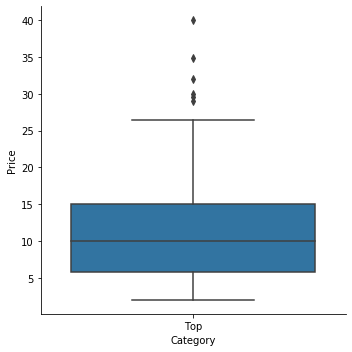

In [15]:
df_med = df_sub[["Category", "Price"]]
df_med["Category"] = df_med[(df_med["Category"] == "Top")]
df_med = df_med.dropna()
                            
sns.catplot(x = "Category", y = "Price", kind = "box", data = df_med)

print('mode: ' + str(df_med[["Price"]].mode()["Price"][0]))
print('mean: ' + str(float(df_med[["Price"]].mean())))

C:\Users\NMari\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


mode: 15.0
mean: 15.714090909090917


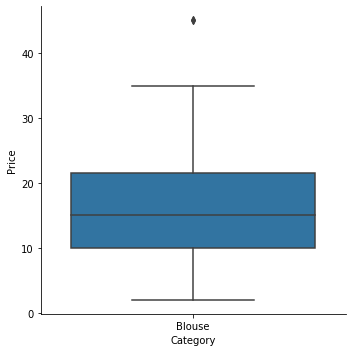

In [16]:
df_med = df_sub[["Category", "Price"]]
df_med["Category"] = df_med[(df_med["Category"] == "Blouse")]
df_med = df_med.dropna() 

sns.catplot(x = "Category", y = "Price", kind = "box", data = df_med)

print('mode: ' + str(df_med[["Price"]].mode()["Price"][0]))
print('mean: ' + str(float(df_med[["Price"]].mean())))

C:\Users\NMari\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


mode: 55.0
mean: 55.536516853932575


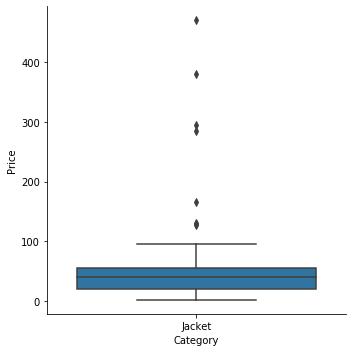

In [17]:
df_med = df_sub[["Category", "Price"]]
df_med["Category"] = df_med[(df_med["Category"] == "Jacket")]
df_med = df_med.dropna() 

sns.catplot(x = "Category", y = "Price", kind = "box", data = df_med)

print('mode: ' + str(df_med[["Price"]].mode()["Price"][0]))
print('mean: ' + str(float(df_med[["Price"]].mean())))

C:\Users\NMari\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


mode: 5.0
mean: 19.445294117647062


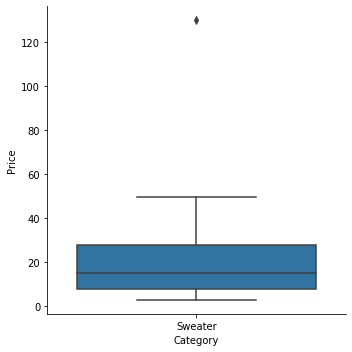

In [18]:
df_med = df_sub[["Category", "Price"]]
df_med["Category"] = df_med[(df_med["Category"] == "Sweater")]
df_med = df_med.dropna() 

sns.catplot(x = "Category", y = "Price", kind = "box", data = df_med)

print('mode: ' + str(df_med[["Price"]].mode()["Price"][0]))
print('mean: ' + str(float(df_med[["Price"]].mean())))

mode: 15.0
mean: 19.10056338028169


C:\Users\NMari\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


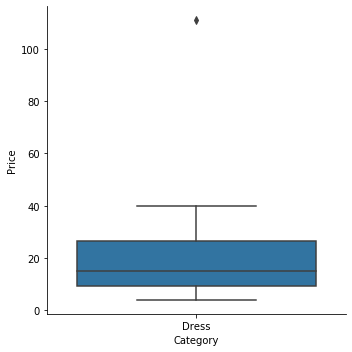

In [19]:
df_med = df_sub[["Category", "Price"]]
df_med["Category"] = df_med[(df_med["Category"] == "Dress")]
df_med = df_med.dropna() 

sns.catplot(x = "Category", y = "Price", kind = "box", data = df_med)

print('mode: ' + str(df_med[["Price"]].mode()["Price"][0]))
print('mean: ' + str(float(df_med[["Price"]].mean())))

C:\Users\NMari\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


mode: 30.0
mean: 25.925333333333334


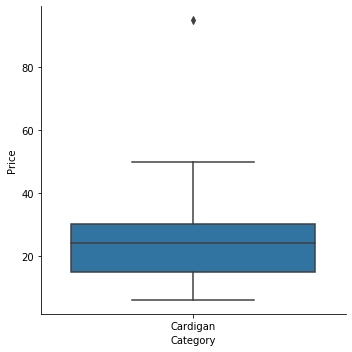

In [20]:
df_med = df_sub[["Category", "Price"]]
df_med["Category"] = df_med[(df_med["Category"] == "Cardigan")]
df_med = df_med.dropna() 

sns.catplot(x = "Category", y = "Price", kind = "box", data = df_med)

print('mode: ' + str(df_med[["Price"]].mode()["Price"][0]))
print('mean: ' + str(float(df_med[["Price"]].mean())))

C:\Users\NMari\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


mode: 3.0
mean: 14.660465116279068


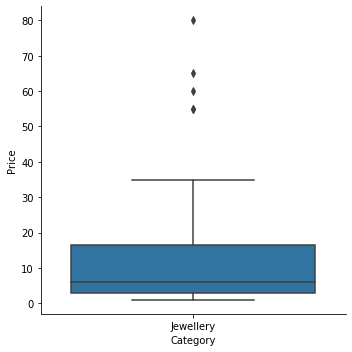

In [21]:
df_med = df_sub[["Category", "Price"]]
df_med["Category"] = df_med[(df_med["Category"] == "Jewellery")]
df_med = df_med.dropna() 

sns.catplot(x = "Category", y = "Price", kind = "box", data = df_med)

print('mode: ' + str(df_med[["Price"]].mode()["Price"][0]))
print('mean: ' + str(float(df_med[["Price"]].mean())))

C:\Users\NMari\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


mode: 5.0
mean: 18.42236842105263


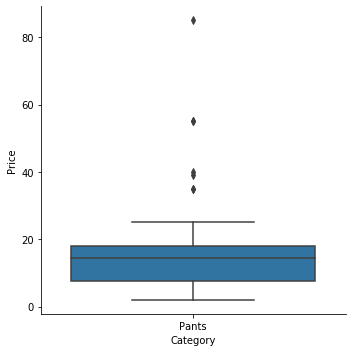

In [22]:
df_med = df_sub[["Category", "Price"]]
df_med["Category"] = df_med[(df_med["Category"] == "Pants")]
df_med = df_med.dropna() 

sns.catplot(x = "Category", y = "Price", kind = "box", data = df_med)

print('mode: ' + str(df_med[["Price"]].mode()["Price"][0]))
print('mean: ' + str(float(df_med[["Price"]].mean())))

C:\Users\NMari\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


mode: 5.0
mean: 13.48484848484848


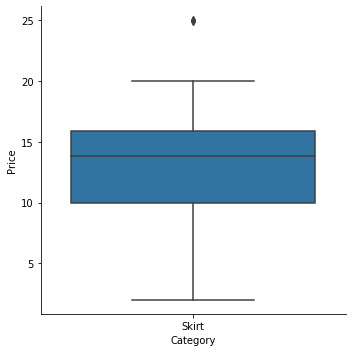

In [23]:
df_med = df_sub[["Category", "Price"]]
df_med["Category"] = df_med[(df_med["Category"] == "Skirt")]
df_med = df_med.dropna() 

sns.catplot(x = "Category", y = "Price", kind = "box", data = df_med)

print('mode: ' + str(df_med[["Price"]].mode()["Price"][0]))
print('mean: ' + str(float(df_med[["Price"]].mean())))

C:\Users\NMari\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


mode: 12.0
mean: 22.26923076923077


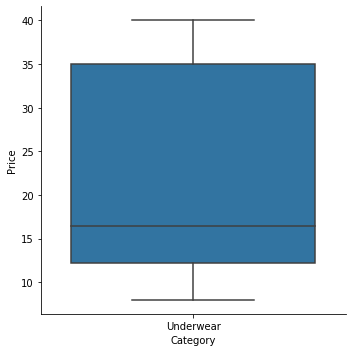

In [24]:
df_med = df_sub[["Category", "Price"]]
df_med["Category"] = df_med[(df_med["Category"] == "Underwear")]
df_med = df_med.dropna() 

sns.catplot(x = "Category", y = "Price", kind = "box", data = df_med)

print('mode: ' + str(df_med[["Price"]].mode()["Price"][0]))
print('mean: ' + str(float(df_med[["Price"]].mean())))

C:\Users\NMari\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


mode: 10.0
mean: 11.349999999999996


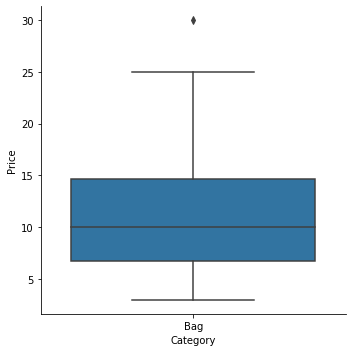

In [25]:
df_med = df_sub[["Category", "Price"]]
df_med["Category"] = df_med[(df_med["Category"] == "Bag")]
df_med = df_med.dropna() 

sns.catplot(x = "Category", y = "Price", kind = "box", data = df_med)

print('mode: ' + str(df_med[["Price"]].mode()["Price"][0]))
print('mean: ' + str(float(df_med[["Price"]].mean())))

C:\Users\NMari\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


mode: 5.0
mean: 8.834615384615386


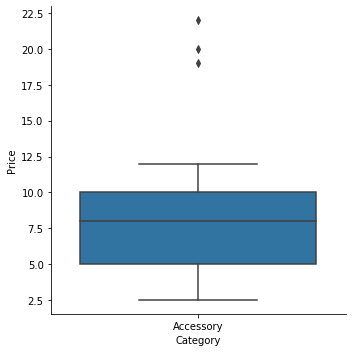

In [26]:
df_med = df_sub[["Category", "Price"]]
df_med["Category"] = df_med[(df_med["Category"] == "Accessory")]
df_med = df_med.dropna() 

sns.catplot(x = "Category", y = "Price", kind = "box", data = df_med)

print('mode: ' + str(df_med[["Price"]].mode()["Price"][0]))
print('mean: ' + str(float(df_med[["Price"]].mean())))

C:\Users\NMari\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


mode: 8.0
mean: 10.376190476190477


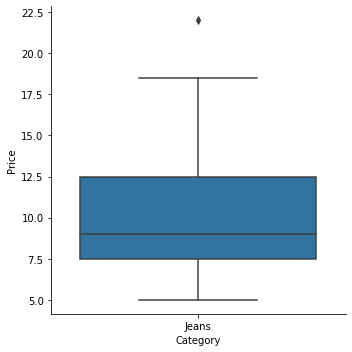

In [27]:
df_med = df_sub[["Category", "Price"]]
df_med["Category"] = df_med[(df_med["Category"] == "Jeans")]
df_med = df_med.dropna() 

sns.catplot(x = "Category", y = "Price", kind = "box", data = df_med)

print('mode: ' + str(df_med[["Price"]].mode()["Price"][0]))
print('mean: ' + str(float(df_med[["Price"]].mean())))

C:\Users\NMari\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


mode: 4.0
mean: 23.5875


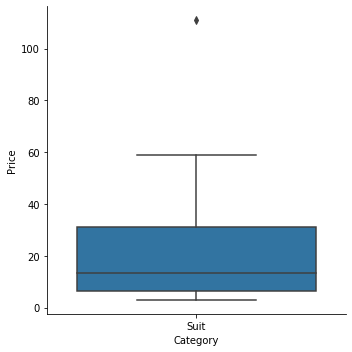

In [28]:
df_med = df_sub[["Category", "Price"]]
df_med["Category"] = df_med[(df_med["Category"] == "Suit")]
df_med = df_med.dropna() 

sns.catplot(x = "Category", y = "Price", kind = "box", data = df_med)

print('mode: ' + str(df_med[["Price"]].mode()["Price"][0]))
print('mean: ' + str(float(df_med[["Price"]].mean())))

C:\Users\NMari\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


mode: 25.0
mean: 59.62352941176471


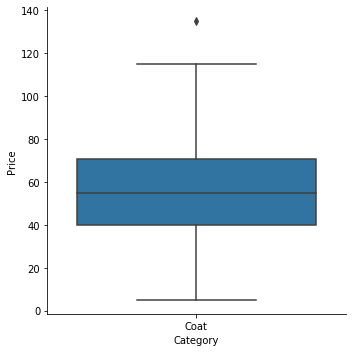

In [29]:
df_med = df_sub[["Category", "Price"]]
df_med["Category"] = df_med[(df_med["Category"] == "Coat")]
df_med = df_med.dropna() 

sns.catplot(x = "Category", y = "Price", kind = "box", data = df_med)

print('mode: ' + str(df_med[["Price"]].mode()["Price"][0]))
print('mean: ' + str(float(df_med[["Price"]].mean())))

C:\Users\NMari\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


mode: 15.0
mean: 19.63181818181818


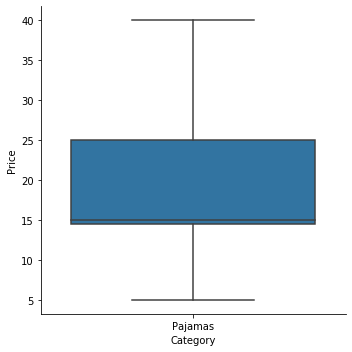

In [30]:
df_med = df_sub[["Category", "Price"]]
df_med["Category"] = df_med[(df_med["Category"] == "Pajamas")]
df_med = df_med.dropna() 

sns.catplot(x = "Category", y = "Price", kind = "box", data = df_med)

print('mode: ' + str(df_med[["Price"]].mode()["Price"][0]))
print('mean: ' + str(float(df_med[["Price"]].mean())))

C:\Users\NMari\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


mode: 7.5
mean: 26.54


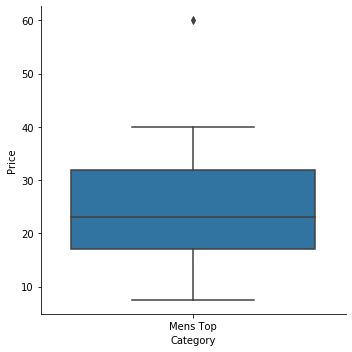

In [31]:
df_med = df_sub[["Category", "Price"]]
df_med["Category"] = df_med[(df_med["Category"] == "Mens Top")]
df_med = df_med.dropna() 

sns.catplot(x = "Category", y = "Price", kind = "box", data = df_med)

print('mode: ' + str(df_med[["Price"]].mode()["Price"][0]))
print('mean: ' + str(float(df_med[["Price"]].mean())))

C:\Users\NMari\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


mode: 5.0
mean: 15.530000000000001


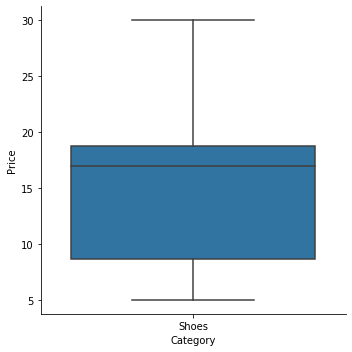

In [32]:
df_med = df_sub[["Category", "Price"]]
df_med["Category"] = df_med[(df_med["Category"] == "Shoes")]
df_med = df_med.dropna() 

sns.catplot(x = "Category", y = "Price", kind = "box", data = df_med)

print('mode: ' + str(df_med[["Price"]].mode()["Price"][0]))
print('mean: ' + str(float(df_med[["Price"]].mean())))

#### Outliers ####

As you can see most of the boxplots have a few outliers. However, there is no need to get worried of faulty data. The outliers aren't that drastic and are probably due to an user pricing their item too high, or an item really deserves that price but is based on another characteristic such as brand or state. 

#### Mean and mode ####

For every item I have calculated the mean and the mode. The mean is the average price of each category and the mode is the price that is most used for each category. I have analyzed each mode and mean and came to the following insights: 

- Coats have the highest mean of €59.62. This might seem as much, but coats are usually seen as the most expensive wardrobe item so it makes sense. 
- Accessories have the lowest mean of only €8.83. This also makes sense as accessories are usually not really expensive. Accessories are, for example, socks, thights and scarves. 

- Jasckets have the highest mode of €55,-. This makes sense as well as Jackets are also seen as expensive. Jackets could also be leather jackets or denim jackets which definitely raises the price by a bit. 
- Jewellery have the lowest mode of only €3,-. This might surprise you as Jewellery isn't really that cheap (unfortunately). However, Vinted has a very difficult policy for luxury brands and are very strict which makes people scared and probably won't use Vinted for that kind of brands. 

### Correlation between Ratio and Price ###

Next I was interested in seeing if there was a correlation between ratio and price.

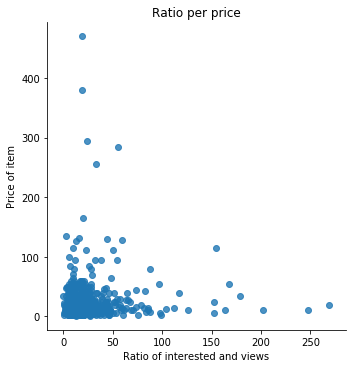

In [44]:
sns.lmplot(x = "Ratio", y = "Price", fit_reg=False, data=df_sub) 
plt.xlabel("Ratio of interested and views") 
plt.ylabel("Price of item")
plt.title("Ratio per price")
plt.show()


The relation is somewhat linear the points lie around a virtual line. However, there a couple outliers on both the price and the ratio scale. As explained before the outliers with the price could be due to an item that was priced incorrectly or given that price for a specific reason and the outliers on the ratio scale could be because of the user buying promotion for that item which you can do on Vinted for 3 days or 7 days. 

The distance seems to be greater the higher the ratio and the price is though. 


### Distribution between Price and Condition ###

Next I want to look a the distribution condition of the item and the price. Firstly I need to look at the names of each state in my dataset to know where to begin:

In [34]:
df_sub["State"].value_counts()

Very good           601
New without tags    113
New with tags        84
Good                 74
Satisfactory          7
Name: State, dtype: int64

As you can see the state "Satisfactory" has very few frequencies. Not very useful to calculate the median and mean. So I decided to not use this state and only use the rest. 

The mean price is: 38.33068376068376


C:\Users\NMari\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


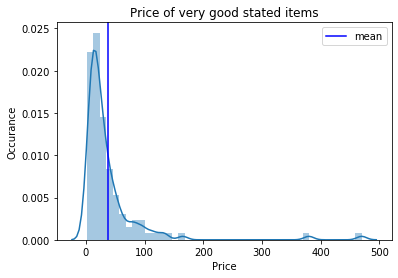

In [58]:
df_con = df_sub[["State", "Price"]]
df_con["State"] = df_con[(df_con["State"] == "Very good")]
df_con = df_con.groupby(["State", "Price"]).size().to_frame("Counts").reset_index()

mean_size = df_con["Price"].mean()

print(f"The mean price is: {mean_size}")

sns.distplot(df_con["Price"])
plt.title("Price of very good stated items")
plt.axvline(mean_size, 0, 500, color='blue', label='mean')
plt.xlabel("Price")
plt.ylabel("Occurance")
plt.legend()
plt.show()

The mean price is: 29.744


C:\Users\NMari\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


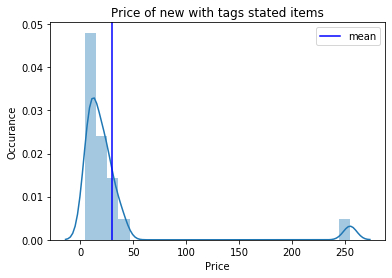

In [59]:
df_con = df_sub[["State", "Price"]]
df_con["State"] = df_con[(df_con["State"] == "New with tags")]
df_con = df_con.groupby(["State", "Price"]).size().to_frame("Counts").reset_index()

mean_size = df_con["Price"].mean()

print(f"The mean price is: {mean_size}")

sns.distplot(df_con["Price"])
plt.title("Price of new with tags stated items")
plt.axvline(mean_size, 0, 500, color='blue', label='mean')
plt.xlabel("Price")
plt.ylabel("Occurance")
plt.legend()
plt.show()

The mean price is: 30.961538461538467


C:\Users\NMari\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


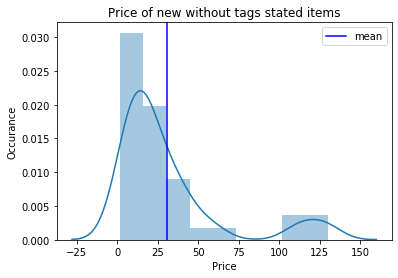

In [60]:
df_con = df_sub[["State", "Price"]]
df_con["State"] = df_con[(df_con["State"] == "New without tags")]
df_con = df_con.groupby(["State", "Price"]).size().to_frame("Counts").reset_index()

mean_size = df_con["Price"].mean()

print(f"The mean price is: {mean_size}")

sns.distplot(df_con["Price"])
plt.title("Price of new without tags stated items")
plt.axvline(mean_size, 0, 500, color='blue', label='mean')
plt.xlabel("Price")
plt.ylabel("Occurance")
plt.legend()
plt.show()

The mean price is: 36.55571428571429


C:\Users\NMari\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


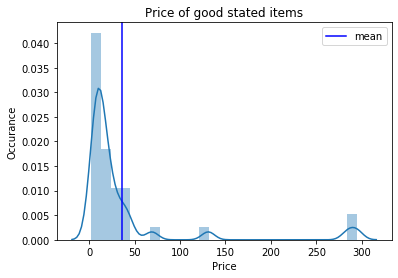

In [61]:
df_con = df_sub[["State", "Price"]]
df_con["State"] = df_con[(df_con["State"] == "Good")]
df_con = df_con.groupby(["State", "Price"]).size().to_frame("Counts").reset_index()

mean_size = df_con["Price"].mean()

print(f"The mean price is: {mean_size}")

sns.distplot(df_con["Price"])
plt.title("Price of good stated items")
plt.axvline(mean_size, 0, 500, color='blue', label='mean')
plt.xlabel("Price")
plt.ylabel("Occurance")
plt.legend()
plt.show()

#### Distribution ####

I have a few things to note about the distributions. 

- Every single distribution has at least two peaks which means they are bimodel. This means that in each state that are items with a low price but also items with a higher price. 
- All distributions are left-skewed. This means that most of the items in each state have a low price. 

#### Mean ####
For each state I have calculated the mean. Earlier I have already explained what the mean is. I have analyzed each mean and came to the following insight:

Very good stated items have the highest mean of €38.33. This insight really surprised me as I would have thought new with tags items would be priced much higher as they have never been worn. However, I might have an explanation for this insight which might be due to Vintage items. Vintage is popular, but can also be quite expensive and they are not new. Vintage is usually made of better quality and made from materials such as wool, leather, acryl, cashmere and so on. Modern items are more likely to be made with synthetic materials which might be reason why the price is lower. 


### Distribution between Price and Brand ###

Lastly I want to look at the distribution brand of the item and the price. Firstly I need to look at the brands of my dataset to know where to begin:

In [39]:
df_sub["Brand"].value_counts()

Vintage      411
Bershka       19
Max Mara      18
Inside        16
Zara          16
            ... 
Maura          1
Vesiica        1
Nomad          1
Weekday        1
Decathlon      1
Name: Brand, Length: 224, dtype: int64

As you can see there are quite a few brands available to use. However, only a couple with useful frequencies. To follow up on my previous insights of the mean of very good stated items, I am going to analyze the brands: Zara, Bershka and Vintage items to see if my hypothesis is correct. 

The median price is: 22.25
The mean price is: 29.09397959183674


C:\Users\NMari\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


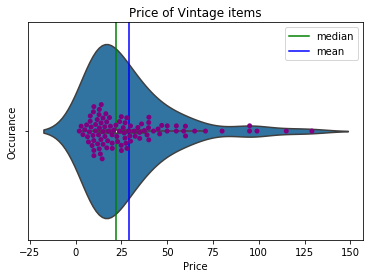

In [40]:
df_b = df_sub[["Brand", "Price"]]
df_b["Brand"] = df_b[(df_b["Brand"] == "Vintage")]
df_b = df_b.groupby(["Brand", "Price"]).size().to_frame("Counts").reset_index()

mean_size = df_b["Price"].mean()
median_size = df_b["Price"].median()

print(f"The median price is: {median_size}")
print(f"The mean price is: {mean_size}")

sns.violinplot(df_b["Price"])
sns.swarmplot(df_b["Price"], color='purple')
plt.title("Price of Vintage items")
plt.axvline(median_size, 0, 500, color='green', label='median')
plt.axvline(mean_size, 0, 500, color='blue', label='mean')
plt.xlabel("Price")
plt.ylabel("Occurance")
plt.legend()
plt.show()

The median price is: 4.25
The mean price is: 4.1875


C:\Users\NMari\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


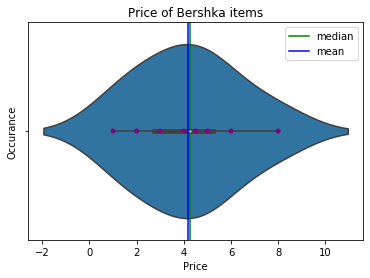

In [41]:
df_b = df_sub[["Brand", "Price"]]
df_b["Brand"] = df_b[(df_b["Brand"] == "Bershka")]
df_b = df_b.groupby(["Brand", "Price"]).size().to_frame("Counts").reset_index()

mean_size = df_b["Price"].mean()
median_size = df_b["Price"].median()

print(f"The median price is: {median_size}")
print(f"The mean price is: {mean_size}")

sns.violinplot(df_b["Price"])
sns.swarmplot(df_b["Price"], color='purple')
plt.title("Price of Bershka items")
plt.axvline(median_size, 0, 100, color='green', label='median')
plt.axvline(mean_size, 0, 100, color='blue', label='mean')
plt.xlabel("Price")
plt.ylabel("Occurance")
plt.legend()
plt.show()

The median price is: 7.5
The mean price is: 7.7375


C:\Users\NMari\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


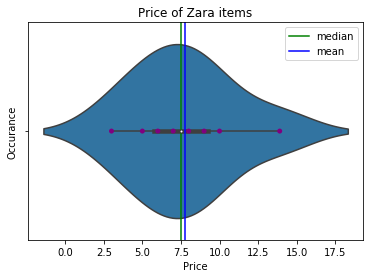

In [42]:
df_b = df_sub[["Brand", "Price"]]
df_b["Brand"] = df_b[(df_b["Brand"] == "Zara")]
df_b = df_b.groupby(["Brand", "Price"]).size().to_frame("Counts").reset_index()

mean_size = df_b["Price"].mean()
median_size = df_b["Price"].median()

print(f"The median price is: {median_size}")
print(f"The mean price is: {mean_size}")

sns.violinplot(df_b["Price"])
sns.swarmplot(df_b["Price"], color='purple')
plt.title("Price of Zara items")
plt.axvline(median_size, 0, 500, color='green', label='median')
plt.axvline(mean_size, 0, 500, color='blue', label='mean')
plt.xlabel("Price")
plt.ylabel("Occurance")
plt.legend()
plt.show()

As expected the price of fast fashion brands such as Zara and Bershka are much lower than Vintage items. Interesting however is that for Zara items the distribution is right-skewed and for Bershka left-skewed. However, it's minimal and I don't necessarily have an explanation for that. 

The distribution for Vintage items is also left-skewed and eventhough there are quite a lot of cheaper Vintage items there are also quite a few more expensive Vintage items which explains why the very good stated items have an higher mean. 

## Please go to the file Final Assignment_Building Model to follow the rest of my assignment. ## 